In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
df = pd.read_csv("D:/agrids/Crop_recommendation.csv")

In [36]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [38]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [39]:
print('Number of Crop types: ',df['label'].nunique())
labels_df = df['label']
crops_labels = pd.DataFrame(df['label'].value_counts())
crops_labels.sort_index(inplace=True)
crops_labels.reset_index(inplace=True)
crops_labels.rename(columns = {'index':'label','label':'count'}, inplace=True)
crops_labels.index.name='index'
crops_labels

Number of Crop types:  22


,label,count
index,,
0,apple,100
1,banana,100
2,blackgram,100
3,chickpea,100
4,coconut,100
5,coffee,100
6,cotton,100
7,grapes,100
8,jute,100


<Axes: xlabel='K', ylabel='Count'>

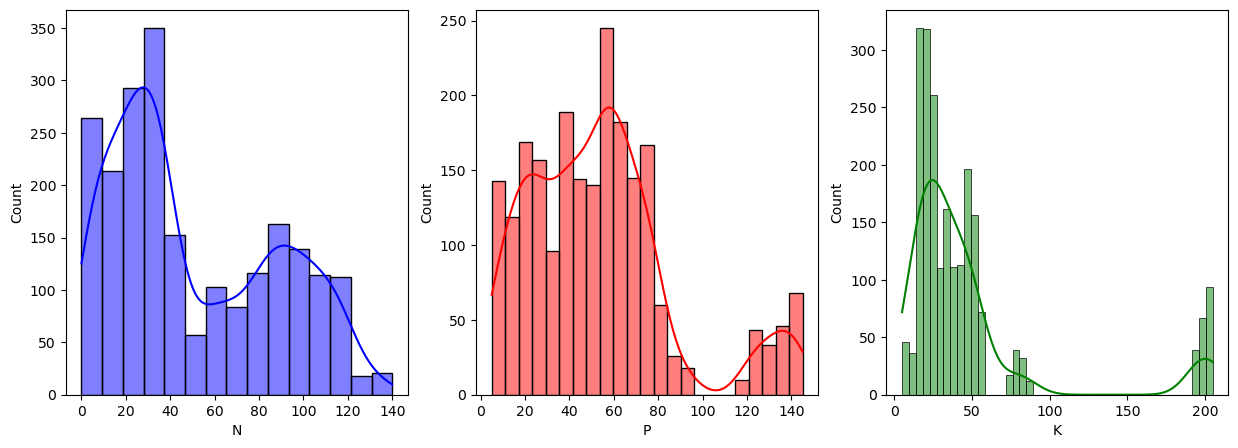

In [40]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
sns.histplot(df['N'],color = 'blue', kde = True)

plt.subplot(1,3,2)
sns.histplot(df['P'],color = 'red', kde = True)

plt.subplot(1,3,3)
sns.histplot(df['K'],color = 'green', kde = True)


<Axes: xlabel='rainfall', ylabel='Count'>

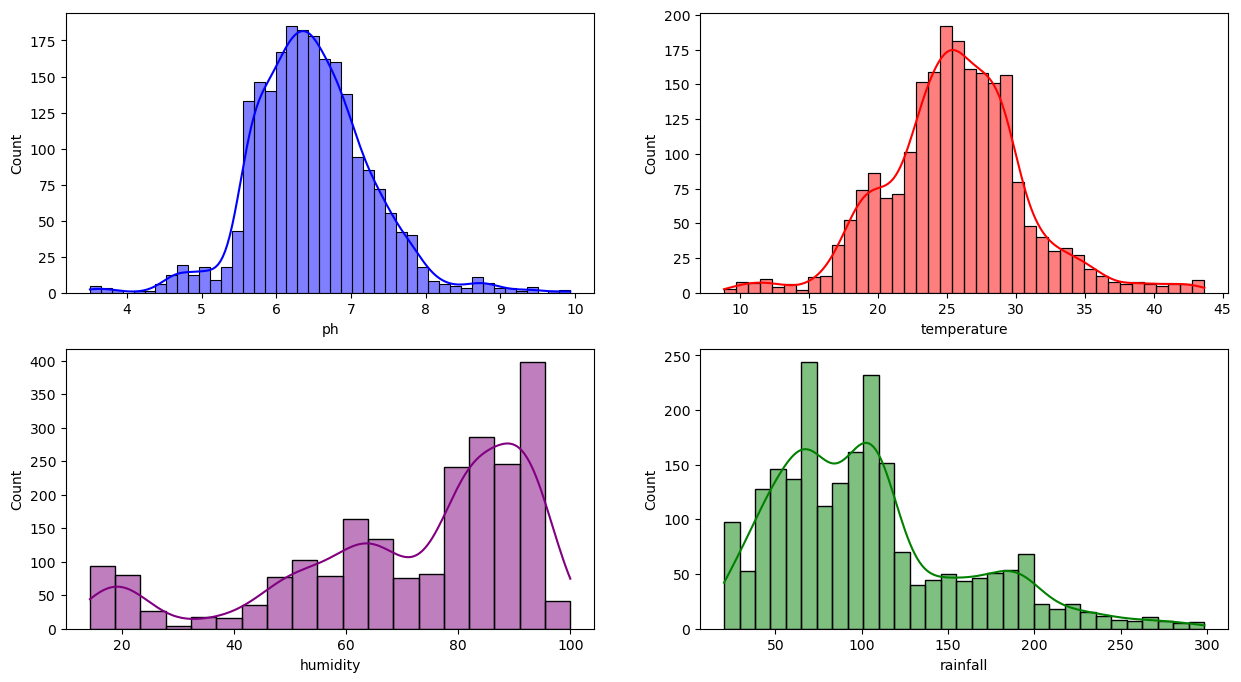

In [41]:
plt.figure(figsize = (15,8))

plt.subplot(2,2,1)
sns.histplot(df['ph'],color = 'blue', kde = True)

plt.subplot(2,2,2)
sns.histplot(df['temperature'],color = 'red', kde = True)

plt.subplot(2,2,3)
sns.histplot(df['humidity'],color = 'purple', kde = True)

plt.subplot(2,2,4)
sns.histplot(df['rainfall'],color = 'green', kde = True)



In [42]:
crop_desc = pd.pivot_table(df, index = 'label', aggfunc= 'mean')
crop_desc.reset_index(inplace = True)
crop_desc

,label,K,N,P,humidity,ph,rainfall,temperature
0,apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
1,banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
2,blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
3,chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
4,coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
5,coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
6,cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
7,grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
8,jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376
9,kidneybeans,20.05,20.75,67.54,21.605357,5.749411,105.919778,20.115085


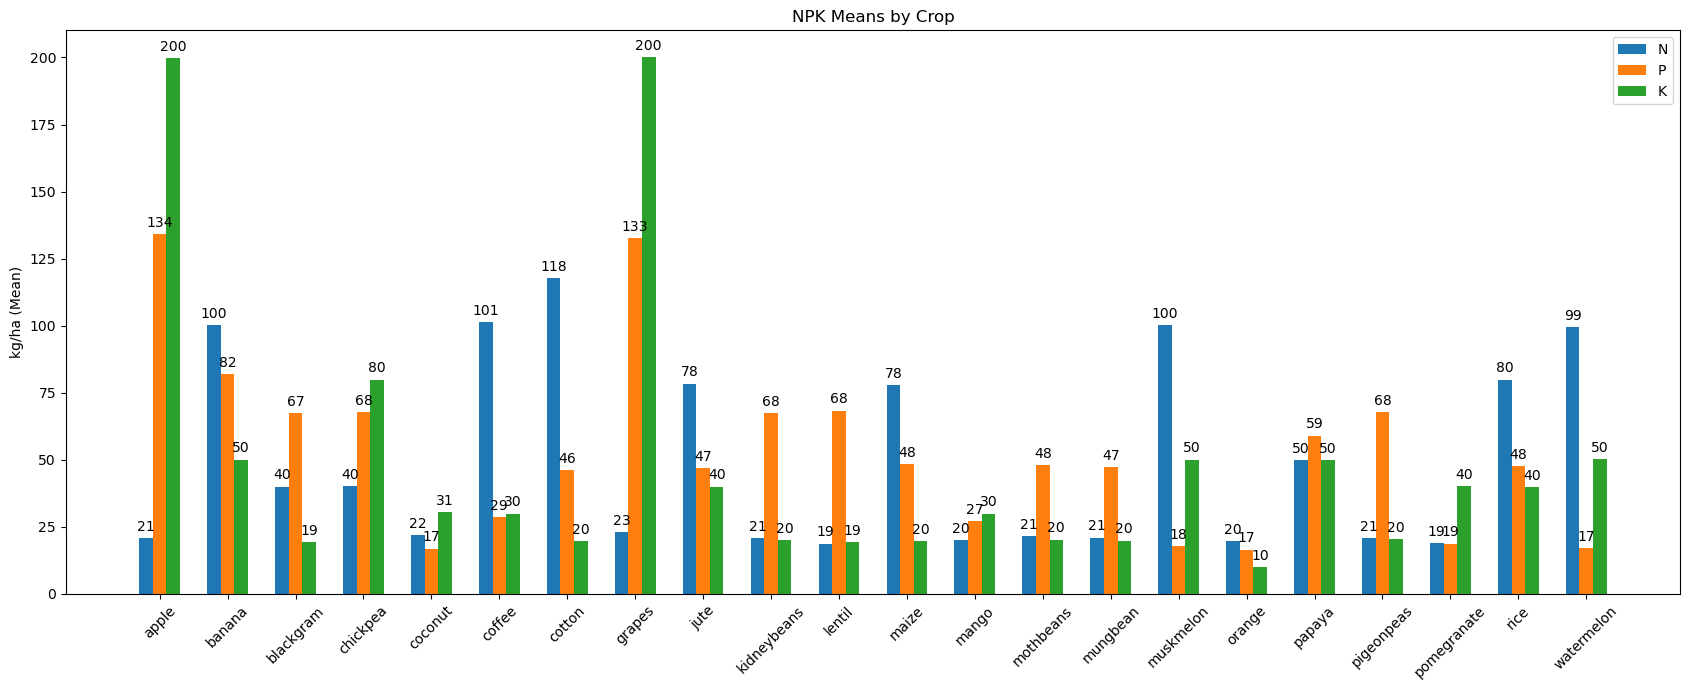

In [43]:
labels = crop_desc['label'].unique()

n_value = crop_desc['N']
p_value = crop_desc['P']
k_value = crop_desc['K']

x = np.arange(len(labels))  
width = 0.2


fig, ax = plt.subplots(1,1, figsize = (17,7))
n_bar = ax.bar(x - width, n_value, width, label='N')
p_bar = ax.bar(x, p_value, width, label='P')
k_bar = ax.bar(x + width, k_value, width, label='K')


ax.set_ylabel('kg/ha (Mean)')
ax.set_title('NPK Means by Crop')
ax.set_xticks(x, labels, rotation = 45)
ax.legend()

ax.bar_label(n_bar, padding=3,label_type='edge',fmt = '%.f')
ax.bar_label(p_bar, padding=3, label_type='edge',fmt = '%.f')
ax.bar_label(k_bar, padding=3, label_type='edge',fmt = '%.f')

fig.tight_layout()

plt.show()

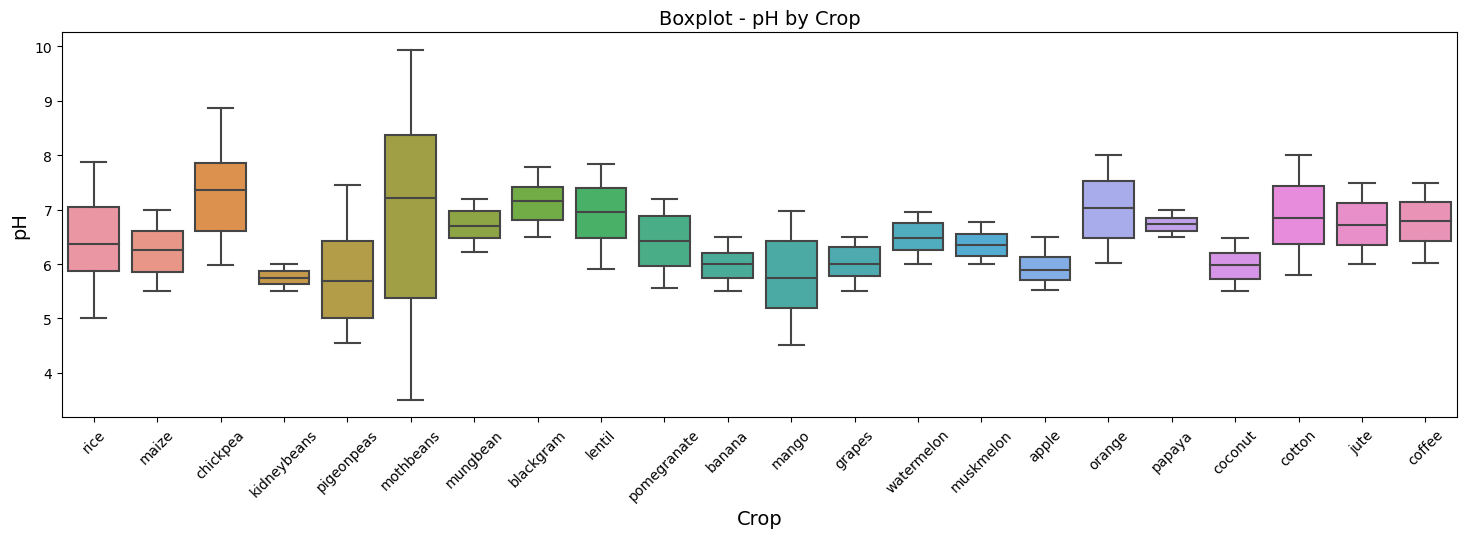

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(18, 5))
ph_boxplot = sns.boxplot(data = df, x = 'label', y = 'ph')
ph_boxplot.set_xlabel('Crop',fontsize = 14)
ph_boxplot.set_ylabel('pH', fontsize = 14)
ph_boxplot.axes.set_title('Boxplot - pH by Crop', fontsize=14)

ph_boxplot.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

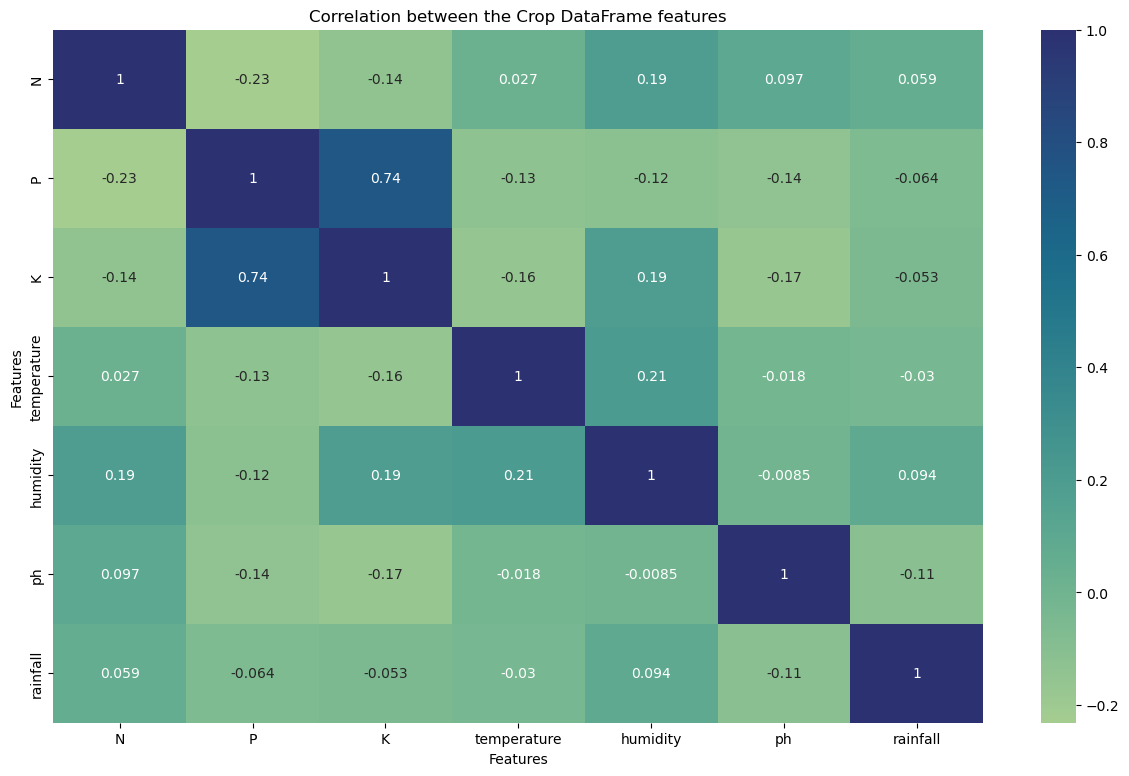

In [45]:

# Filter out non-numeric columns from the DataFrame 'df' to calculate the correlation.
numeric_df = df.select_dtypes(include=[float, int])

# Create a subplot with 1 row and 1 column, and set the figure size.
fig, ax = plt.subplots(1, 1, figsize=(15, 9))

# Use seaborn's heatmap function to create the correlation heatmap for the numeric DataFrame 'numeric_df'.
sns.heatmap(numeric_df.corr(), annot=True, cmap='crest')

# Set the x and y labels for the heatmap.
ax.set(xlabel='Features')
ax.set(ylabel='Features')

# Set the title of the heatmap.
plt.title('Correlation between the Crop DataFrame features')

# Display the heatmap.
plt.show()


# Classification Model

In [46]:
X = df.drop('label', axis = 1)
y = df['label']

### Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics



X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state =3)


param_dict = {
    'criterion':['gini','entropy'],
    'max_depth':[2,4,6,8,10,12,14,16,18,20,22],
    'random_state':[2]
}
test_dec_tree = DecisionTreeClassifier(random_state = 2)
test_dec_tree.fit(X_train, y_train)


grid = GridSearchCV(test_dec_tree, param_dict, cv = 5, n_jobs = -1, verbose = 3)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)


Fitting 5 folds for each of 22 candidates, totalling 110 fits
{'criterion': 'gini', 'max_depth': 12, 'random_state': 2}
0.9844155844155844


In [48]:
Dec_tree = DecisionTreeClassifier(max_depth = 12, criterion = 'gini', random_state = 2)

Dec_tree.fit(X_train, y_train)
dt_train_score = Dec_tree.score(X_train, y_train)
print(f'Decision Tree Train Accuracy is : {dt_train_score :.4f}')

dt_predicted_values = Dec_tree.predict(X_test)
dt_test_score = metrics.accuracy_score(y_test, dt_predicted_values)
print(f'Decision Tree Test Accuracy is : {dt_test_score :.4f}')
dt_report = classification_report(y_test, dt_predicted_values, digits = 4)
print(dt_report)

Decision Tree Train Accuracy is : 0.9981
Decision Tree Test Accuracy is : 0.9909
              precision    recall  f1-score   support

       apple     1.0000    1.0000    1.0000        28
      banana     0.9600    1.0000    0.9796        24
   blackgram     0.9615    1.0000    0.9804        25
    chickpea     1.0000    1.0000    1.0000        37
     coconut     1.0000    1.0000    1.0000        37
      coffee     1.0000    0.9697    0.9846        33
      cotton     1.0000    1.0000    1.0000        28
      grapes     1.0000    1.0000    1.0000        37
        jute     0.9259    1.0000    0.9615        25
 kidneybeans     1.0000    1.0000    1.0000        33
      lentil     1.0000    0.9677    0.9836        31
       maize     0.9697    1.0000    0.9846        32
       mango     1.0000    1.0000    1.0000        31
   mothbeans     0.9630    0.9630    0.9630        27
    mungbean     1.0000    1.0000    1.0000        24
   muskmelon     1.0000    1.0000    1.0000        33


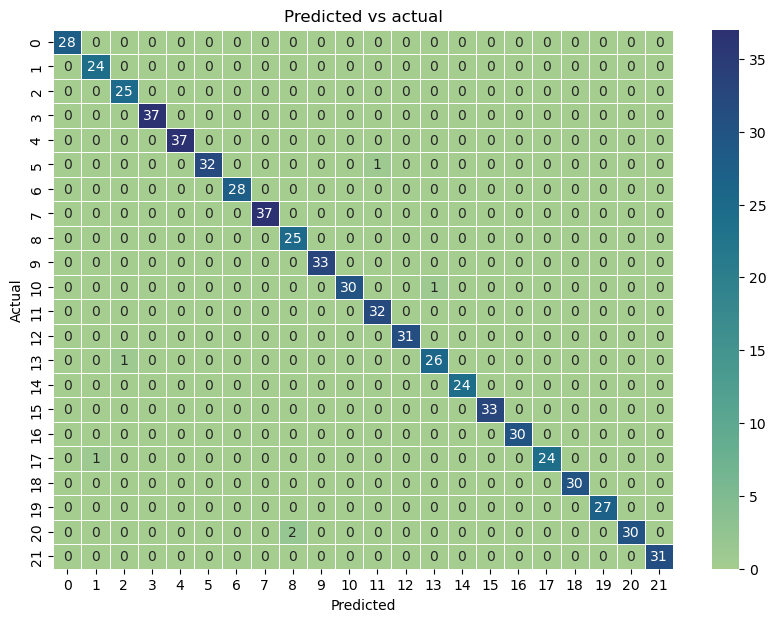

In [49]:
from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_test,dt_predicted_values)

f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f",  cmap='crest', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

### Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
test_rdf_clf = RandomForestClassifier(random_state = 2)
test_rdf_clf.fit(X_train, y_train)

param_dict = {
    'n_estimators':[50,100,150,200],
    'criterion':['gini','entropy'],
    'max_depth':[2,4,6,8,10,12,14,16,18,20,22],
    'random_state':[2]
}

grid = GridSearchCV(test_rdf_clf, param_dict, cv = 5, n_jobs = -1, verbose = 3)
grid.fit(X_train, y_train)
print(grid.best_params_)



Fitting 5 folds for each of 88 candidates, totalling 440 fits
{'criterion': 'gini', 'max_depth': 12, 'n_estimators': 50, 'random_state': 2}


In [52]:
rdf_clf = RandomForestClassifier(n_estimators = 50, criterion = 'gini', max_depth = 12, random_state = 2)

rdf_clf.fit(X_train, y_train)
rdf_train_score = rdf_clf.score(X_train,y_train)
print(f'Random Forest Train Accuracy is : {rdf_train_score :.4f}')

rdf_predicted_values = rdf_clf.predict(X_test)
rdf_test_score = metrics.accuracy_score(y_test, rdf_predicted_values)
print(f'Random Forest Test Accuracy is : {rdf_test_score :.4f}')
rdf_report = classification_report(y_test, rdf_predicted_values, digits = 4)
print(rdf_report)


Random Forest Train Accuracy is : 0.9994
Random Forest Test Accuracy is : 0.9924
              precision    recall  f1-score   support

       apple     1.0000    1.0000    1.0000        28
      banana     1.0000    1.0000    1.0000        24
   blackgram     0.9615    1.0000    0.9804        25
    chickpea     1.0000    1.0000    1.0000        37
     coconut     1.0000    1.0000    1.0000        37
      coffee     1.0000    1.0000    1.0000        33
      cotton     1.0000    1.0000    1.0000        28
      grapes     1.0000    1.0000    1.0000        37
        jute     0.8621    1.0000    0.9259        25
 kidneybeans     1.0000    1.0000    1.0000        33
      lentil     1.0000    1.0000    1.0000        31
       maize     1.0000    1.0000    1.0000        32
       mango     1.0000    1.0000    1.0000        31
   mothbeans     1.0000    0.9630    0.9811        27
    mungbean     1.0000    1.0000    1.0000        24
   muskmelon     1.0000    1.0000    1.0000        33


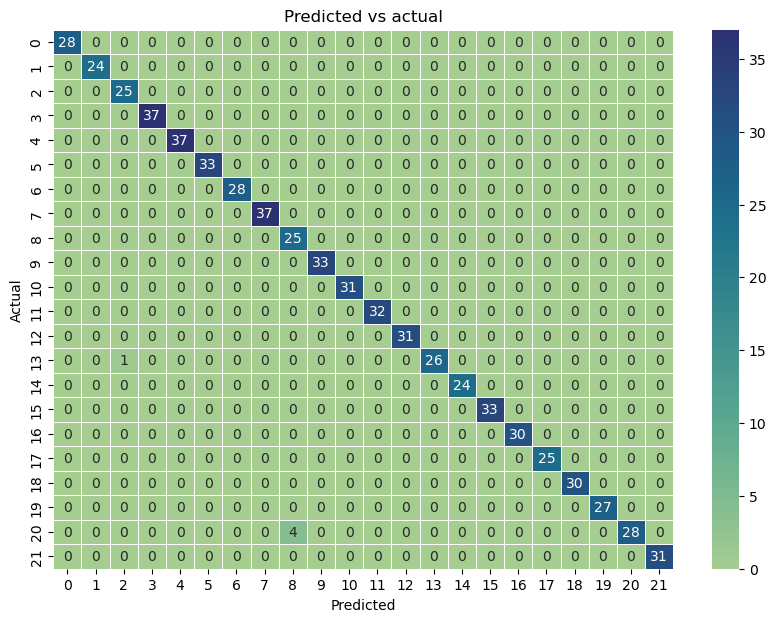

In [53]:
cm_rdf = confusion_matrix(y_test,rdf_predicted_values)

f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm_rdf, annot=True, linewidth=0.5, fmt=".0f",  cmap='crest', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

### K-Nearest Neighbors

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)



In [55]:
score_list = []
for i in range(4,20):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train_scaled, y_train)

    knn_train_score = knn.score(X_train_scaled,y_train)

    knn_predicted_values = knn.predict(X_test_scaled)
    knn_test_score = metrics.accuracy_score(y_test, knn_predicted_values)

    score_list.append((i, knn_train_score, knn_test_score))
    score_knn_df = pd.DataFrame(score_list, columns = ['k','Train Score', 'Test Score'])
score_knn_df


,k,Train Score,Test Score
0,4,0.979221,0.974242
1,5,0.982468,0.975758
2,6,0.976623,0.974242
3,7,0.981818,0.971212
4,8,0.976623,0.972727
5,9,0.975974,0.975758
6,10,0.970779,0.972727
7,11,0.973377,0.969697
8,12,0.968831,0.965152
9,13,0.967532,0.965152


In [56]:
knn = KNeighborsClassifier(n_neighbors= 9)
knn.fit(X_train_scaled, y_train)

knn_train_score = knn.score(X_train_scaled,y_train)
print(f'K-Nearest Neighbors Train Accuracy is : {knn_train_score :.4f}')

knn_predicted_values = knn.predict(X_test_scaled)
knn_test_score = metrics.accuracy_score(y_test, knn_predicted_values)


print(f'K-Nearest Neighbors Test Accuracy is : {knn_test_score :.4f}')
knn_report = classification_report(y_test, knn_predicted_values, digits = 4)
print(knn_report)

K-Nearest Neighbors Train Accuracy is : 0.9760
K-Nearest Neighbors Test Accuracy is : 0.9758
              precision    recall  f1-score   support

       apple     1.0000    1.0000    1.0000        28
      banana     1.0000    1.0000    1.0000        24
   blackgram     0.8621    1.0000    0.9259        25
    chickpea     1.0000    1.0000    1.0000        37
     coconut     0.9737    1.0000    0.9867        37
      coffee     1.0000    1.0000    1.0000        33
      cotton     0.9655    1.0000    0.9825        28
      grapes     1.0000    1.0000    1.0000        37
        jute     0.8065    1.0000    0.8929        25
 kidneybeans     0.9706    1.0000    0.9851        33
      lentil     0.9394    1.0000    0.9688        31
       maize     1.0000    0.9688    0.9841        32
       mango     1.0000    1.0000    1.0000        31
   mothbeans     1.0000    0.9259    0.9615        27
    mungbean     1.0000    1.0000    1.0000        24
   muskmelon     1.0000    1.0000    1.000

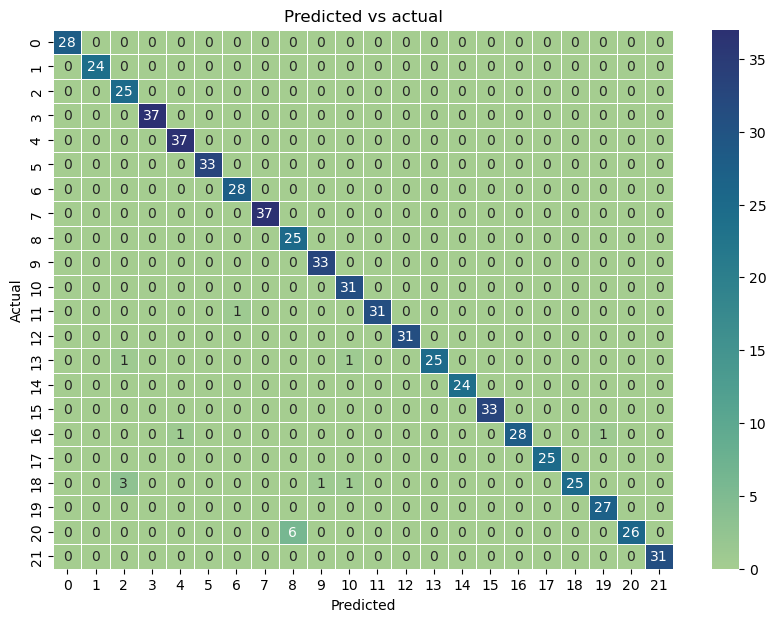

In [57]:
cm_knn = confusion_matrix(y_test,knn_predicted_values)

f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm_knn, annot=True, linewidth=0.5, fmt=".0f",  cmap='crest', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

### SVM Classifier

In [ ]:
from sklearn.svm import SVC

test_svm = SVC()
test_svm.fit(X_train_scaled,y_train)
test_svm.score(X_test_scaled,y_test)

param_dict = {
    'C':[0.1,1,100,1000],
    'kernel':['rbf','poly','sigmoid','linear'],
    'degree':[1,2,3,4,5,6],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}

grid = GridSearchCV(test_svm, param_dict, cv = 5, n_jobs = -1, verbose = 3)
grid.fit(X_train_scaled, y_train)
print(grid.best_params_)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


In [ ]:
svm = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
svm.fit(X_train_scaled, y_train)

svm_train_score = svm.score(X_train_scaled,y_train)
print(f'SVM Train Accuracy is : {svm_train_score :.4f}')

svm_predicted_values = svm.predict(X_test_scaled)
svm_test_score = metrics.accuracy_score(y_test, svm_predicted_values)
print(f'SVM Test Accuracy is : {svm_test_score :.4f}')
svm_report = classification_report(y_test, svm_predicted_values, digits = 4)
print(svm_report)

In [ ]:
cm_svm = confusion_matrix(y_test,svm_predicted_values)

f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm_svm, annot=True, linewidth=0.5, fmt=".0f",  cmap='crest', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

### Naive-Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

gnb_train_score = gnb.score(X_train,y_train)
print(f'GNB Train Accuracy is : {gnb_train_score :.4f}')

gnb_predicted_values = gnb.predict(X_test)
gnb_test_score = metrics.accuracy_score(y_test, gnb_predicted_values)
print(f'GNB Test Accuracy is : {gnb_test_score :.4f}')
gnb_report = classification_report(y_test, gnb_predicted_values, digits = 4)
print(gnb_report)

In [ ]:
cm_gnb = confusion_matrix(y_test,gnb_predicted_values)

f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm_gnb, annot=True, linewidth=0.5, fmt=".0f",  cmap='crest', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

### Exporting Random Forest Model